In [1]:
import os
import User_data as ud
import Data_processing as proc
import formatting as fm
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
folders = list(filter(lambda x: "enth" in x and "csv" not in x, os.listdir()))
#filters folders named enth

In [3]:
"""
creates a dictionary where key is the name of the user and
value is a list of the directory of the sensor data files
"""
dic = {}
for i in folders:
    dic[i] = list(map(lambda x: f"{os.getcwd()}/{i}/{x}", filter(lambda x: "enth" in x, os.listdir(i))))

In [4]:
survey_dir = f"{os.getcwd()}/onboarding"
survey_file = os.listdir(survey_dir)[0]
survey_results = pd.read_csv(f"{survey_dir}/{survey_file}")\
.rename(columns={"Experiment tag (for example enth99)" : "user_id"})\
.set_index("user_id")

In [5]:
def process_main():
    """
    processes all users' data
    creates a new file for each user
    also creates a new file and returns a dataframe of all users combined
    """
    container = []
    for user, files in dic.items():
        file = ud.merge_all(files)
        file["user_id"] = user
        for col in survey_results.columns:
            file[col] = survey_results.at[user, col]
        container.append(file)
        file.to_csv(f"{user}_merged_z.csv")
    all_users = pd.concat(container)
    all_users.to_csv("enth_all_users_merged_z.csv")
    return all_users

#inefficient; each user has to read all the sensor data 

In [6]:
all_users = process_main()

In [29]:
all_users = pd.read_csv("enth_all_users_merged_z.csv").set_index("time")

In [30]:
print(all_users.columns)
all_users

Index(['space_id', 'faculty_name', 'fitbit.air-vel', 'fitbit.bodyPresence',
       'fitbit.change', 'fitbit.clothing', 'fitbit.comfort',
       'fitbit.heartRate', 'fitbit.indoorOutdoor', 'fitbit.lat',
       ...
       'Extraverted, enthusiastic', 'Critical, quarrelsome',
       'Dependable, self-disciplined', 'Anxious, easily upset',
       'Open to new experience, complex', 'Reserved, quiet',
       'Sympathetic, warm', 'Disorganized, careless',
       'Calm, emotionally stable', 'Conventional, unreactive'],
      dtype='object', length=112)


,space_id,faculty_name,fitbit.air-vel,fitbit.bodyPresence,fitbit.change,fitbit.clothing,fitbit.comfort,fitbit.heartRate,fitbit.indoorOutdoor,fitbit.lat,...,"Extraverted, enthusiastic","Critical, quarrelsome","Dependable, self-disciplined","Anxious, easily upset","Open to new experience, complex","Reserved, quiet","Sympathetic, warm","Disorganized, careless","Calm, emotionally stable","Conventional, unreactive"
time,,,,,,,,,,,,,,,,,,,,,
2021-03-17 15:30:00+08:00,2,SDE4,10.0,True,10.0,10.0,10.0,87.0,11.0,NaN,...,5,3,6,3,5,5,5,5,5,2
2021-03-17 15:33:00+08:00,2,SDE4,10.0,True,10.0,10.0,10.0,67.0,11.0,NaN,...,5,3,6,3,5,5,5,5,5,2
2021-03-17 15:53:00+08:00,2,SDE4,10.0,True,10.0,10.0,9.0,87.0,9.0,NaN,...,5,3,6,3,5,5,5,5,5,2
2021-03-17 16:08:00+08:00,210,SDE2,11.0,True,10.0,10.0,10.0,70.0,11.0,1.297642,...,5,3,6,3,5,5,5,5,5,2
2021-03-17 16:23:00+08:00,210,SDE2,11.0,True,10.0,10.0,10.0,66.0,11.0,1.297630,...,5,3,6,3,5,5,5,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30 17:44:00+08:00,-1,NaN,10.0,True,10.0,9.0,10.0,74.0,11.0,1.297467,...,7,5,3,1,7,1,7,3,5,2
2021-04-30 18:01:00+08:00,103,SDE1,10.0,True,10.0,9.0,9.0,63.0,11.0,1.297465,...,7,5,3,1,7,1,7,3,5,2
2021-04-30 18:17:00+08:00,103,SDE1,10.0,True,10.0,9.0,10.0,74.0,11.0,1.297467,...,7,5,3,1,7,1,7,3,5,2


# Renaming columns

In [31]:
new_names = ['Space ID',
 'Faculty Name',
 'Fitbit Air Velocity',
 'Fitbit Body Presence',
 'Fitbit Change',
 'Fitbit Clothing',
 'Fitbit Comfort',
 'Fitbit Heart Rate',
 'Fitbit Indoor/outdoor',
 'Fitbit Latitude',
 'Fitbit Longitude',
 'Fitbit Metabolism',
 'Fitbit Response Speed',
 'Fitbit Resting Heart Rate',
 'Fitbit Thermal',
 'Fitbit Vote Log',
 'iButton Ambient Temp(℃)',
 'Steerpath Accuracy',
 'Steerpath Floor',
 'Steerpath Latitude',
 'Steerpath Longitude',
 'Steerpath Space',
 'iButton Skin Temp(℃)',
 'Fitbit API Heart Rate',
 'Fitbit API Steps',
 'Ubibot Temperature(℃)',
 'Ubibot Humidity(%)',
 'Ubibot Light(lux)',
 'Ubibot Voltage(V)',
 'Ubibot WIFI RSSI(dBm)',
 'Ubibot GSM RSSI(dBm)',
 'Ubibot EXT1 Temperature(℃)',
 'Ubibot EXT2 Temperature(℃)',
 'Ubibot RS485 Temperature(℃)',
 'Ubibot RS485 Humidity(%)',
 'BMS VAV2-3|Temp at space_id: 201',
 'BMS VAV2-4|Temp at space_id: 201',
 'BMS VAV2-5|Temp at space_id: 201',
 'BMS VAV2-6|Temp at space_id: 201',
 'BMS VAV2-18|Temp at space_id: 202',
 'BMS VAV2-20|Temp at space_id: 203',
 'BMS VAV2-7N8|Temp at space_id: 204',
 'BMS VAV2-9N27|Temp at space_id: 204',
 'BMS VAV2-22|Temp at space_id: 206',
 'BMS VAV2-17|Temp at space_id: 207',
 'BMS VAV2-16|Temp at space_id: 207',
 'BMS VAV2-12|Temp at space_id: 208',
 'Awair Score',
 'Awair Temp',
 'Awair Humid',
 'Awair CO2',
 'Awair VOC',
 'Awair PM25',
 'Awair Light',
 'Awair Noise',
 'Awair Device UUID',
 'Sensing Humidity', 
    'Sensing Light', 
    'Sensing Noise', 
    'Sensing Temperature', 
 'PurpleAir 0.3um count',
 'PurpleAir 0.5um count',
 'PurpleAir 1.0um count',
 'PurpleAir 10.0um count',
 'PurpleAir 2.5um count',
 'PurpleAir 5.0um count',
 'PurpleAir Humidity',
 'PurpleAir PM1.0',
 'PurpleAir PM10.0',
 'PurpleAir PM2.5',
 'PurpleAir Pressure',
 'PurpleAir Temperature',
 'User ID',
'Year of birth (for example 1995)', 'Sex', 'Height (cm)', 'Weight (kg)',
       'Shoulder circumference (cm)',
       'How long have you been in Singapore (in years)?',
       'Can you say that you are used to the weather in Singapore?',
       'Can you say that you are satisfied with the weather in this city (outdoor weather conditions)?',
       'Do you suffer from sweating in Singapore?',
       'Do you enjoy being outdoor in Singapore?',
       'What is your estimation of your time (hours) spent outdoor (per day) during the weekdays? (for example 2 hrs)',
       'What is your estimation of your time (hours) spent outdoor (per day) during the weekend? (for example 4 hrs)',
       'Do you seem to be aware of subtleties in your environment? ',
       'Are you easily overwhelmed by things like bright lights, strong smells, coarse fabrics, or sirens close by?',
       'Do you have a rich, complex inner life?',
       'Do you get rattled when you have a lot to do in a short amount of time?',
       'Are you deeply moved by the arts or music?',
       'Are you annoyed when people try to get you to do too many things at once?',
       'Do you make a point to avoid violent movies and TV shows?',
       'Do you find it unpleasant to have a lot going on at once?',
       'Do changes in your life shake you up?',
       'Do you notice and enjoy delicate or fine scents, tastes, sounds, works of art?',
       'Are you bothered by intense stimuli, like loud noises or chaotic scenes?',
       'When you must compete or be observed while performing a task, do you become so nervous or shaky that you do much worse than you would otherwise?',
       'In most ways my life is close to my ideal',
       'The conditions of my life are excellent',
       'I am satisfied with my life',
       'So far I have gotten the important things I want in life',
       'If I could live my life over, I would change almost nothing',
       'Extraverted, enthusiastic', 'Critical, quarrelsome',
       'Dependable, self-disciplined', 'Anxious, easily upset',
       'Open to new experience, complex', 'Reserved, quiet',
       'Sympathetic, warm', 'Disorganized, careless',
       'Calm, emotionally stable', 'Conventional, unreactive']

In [32]:
all_users.columns = new_names

In [33]:
all_users.to_csv("enth_new_cols_z.csv")

In [34]:
all_users

,Space ID,Faculty Name,Fitbit Air Velocity,Fitbit Body Presence,Fitbit Change,Fitbit Clothing,Fitbit Comfort,Fitbit Heart Rate,Fitbit Indoor/outdoor,Fitbit Latitude,...,"Extraverted, enthusiastic","Critical, quarrelsome","Dependable, self-disciplined","Anxious, easily upset","Open to new experience, complex","Reserved, quiet","Sympathetic, warm","Disorganized, careless","Calm, emotionally stable","Conventional, unreactive"
time,,,,,,,,,,,,,,,,,,,,,
2021-03-17 15:30:00+08:00,2,SDE4,10.0,True,10.0,10.0,10.0,87.0,11.0,NaN,...,5,3,6,3,5,5,5,5,5,2
2021-03-17 15:33:00+08:00,2,SDE4,10.0,True,10.0,10.0,10.0,67.0,11.0,NaN,...,5,3,6,3,5,5,5,5,5,2
2021-03-17 15:53:00+08:00,2,SDE4,10.0,True,10.0,10.0,9.0,87.0,9.0,NaN,...,5,3,6,3,5,5,5,5,5,2
2021-03-17 16:08:00+08:00,210,SDE2,11.0,True,10.0,10.0,10.0,70.0,11.0,1.297642,...,5,3,6,3,5,5,5,5,5,2
2021-03-17 16:23:00+08:00,210,SDE2,11.0,True,10.0,10.0,10.0,66.0,11.0,1.297630,...,5,3,6,3,5,5,5,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30 17:44:00+08:00,-1,NaN,10.0,True,10.0,9.0,10.0,74.0,11.0,1.297467,...,7,5,3,1,7,1,7,3,5,2
2021-04-30 18:01:00+08:00,103,SDE1,10.0,True,10.0,9.0,9.0,63.0,11.0,1.297465,...,7,5,3,1,7,1,7,3,5,2
2021-04-30 18:17:00+08:00,103,SDE1,10.0,True,10.0,9.0,10.0,74.0,11.0,1.297467,...,7,5,3,1,7,1,7,3,5,2


# Function to match Space ID with its name

In [35]:
spaces = pd.read_csv("spaces_database_z.csv")

def sp_dic():
    """
    creates a dictionary where key is space_id and value is the space_name
    so we can make it easier to find out the name of the space from plots
    """
    dic_spaces = {}
    invalid_spaces = []
    for i in spaces.index:
        sp_id = spaces["space_id"][i]
        sp_name = spaces["space_name"][i]
        if np.isnan(sp_id):
            invalid_spaces.append(sp_name)
        else:
            dic_spaces[int(sp_id)] = sp_name
    dic_spaces[-1] = invalid_spaces
    return dic_spaces

dic_spaces = sp_dic()

def find_space_name(space_id):
    """
    function to locate the space_id with included faculty name
    """
    fac_name = "unknown"
    if space_id >= 200:
        fac_name = "SDE2"
    elif space_id >= 100:
        fac_name = "SDE1"
    elif space_id >= 0:
        fac_name = "SDE4"
    return f"{fac_name} {dic_spaces[space_id]}"

# Visualisation

<AxesSubplot:xlabel='Do you enjoy being outdoor in Singapore?', ylabel='Fitbit API Heart Rate'>

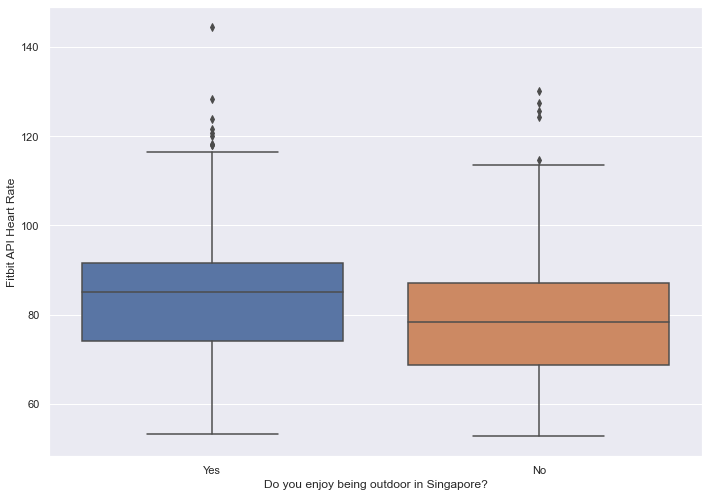

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="Do you enjoy being outdoor in Singapore?", y="Fitbit API Heart Rate", data=all_users)

<AxesSubplot:xlabel='How long have you been in Singapore (in years)?', ylabel='Can you say that you are satisfied with the weather in this city (outdoor weather conditions)?'>

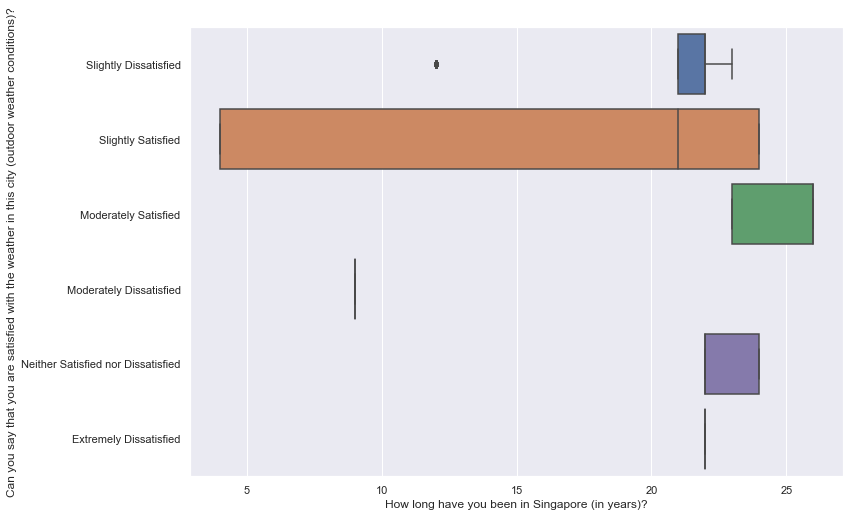

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='How long have you been in Singapore (in years)?', y='Can you say that you are satisfied with the weather in this city (outdoor weather conditions)?', data=all_users)

<AxesSubplot:xlabel='What is your estimation of your time (hours) spent outdoor (per day) during the weekdays? (for example 2 hrs)', ylabel='Fitbit API Heart Rate'>

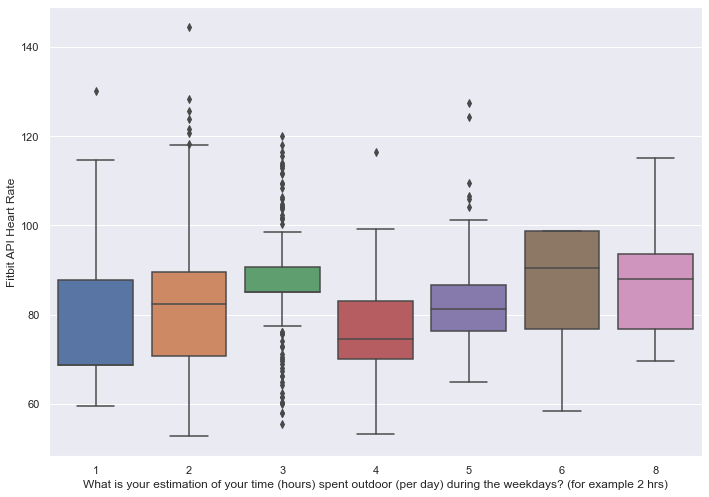

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='What is your estimation of your time (hours) spent outdoor (per day) during the weekdays? (for example 2 hrs)', y="Fitbit API Heart Rate", data=all_users)

<AxesSubplot:xlabel='Do you enjoy being outdoor in Singapore?', ylabel='Fitbit API Heart Rate'>

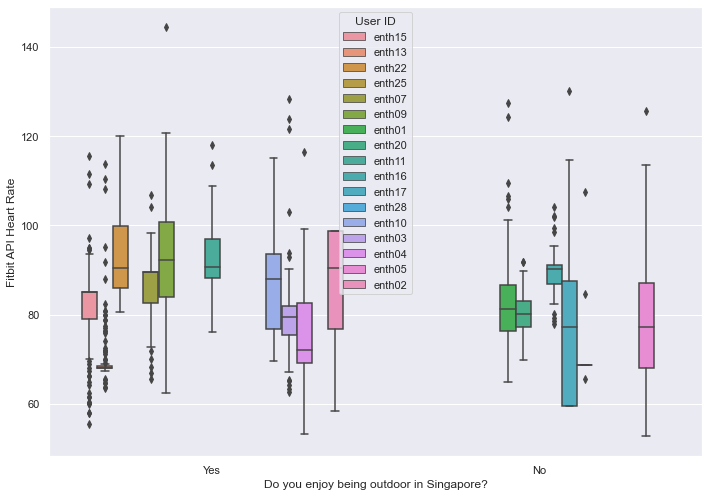

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(hue="User ID", y="Fitbit API Heart Rate", x="Do you enjoy being outdoor in Singapore?", data=all_users)

array([[<AxesSubplot:title={'center':'Year of birth (for example 1995)'}>]],
      dtype=object)

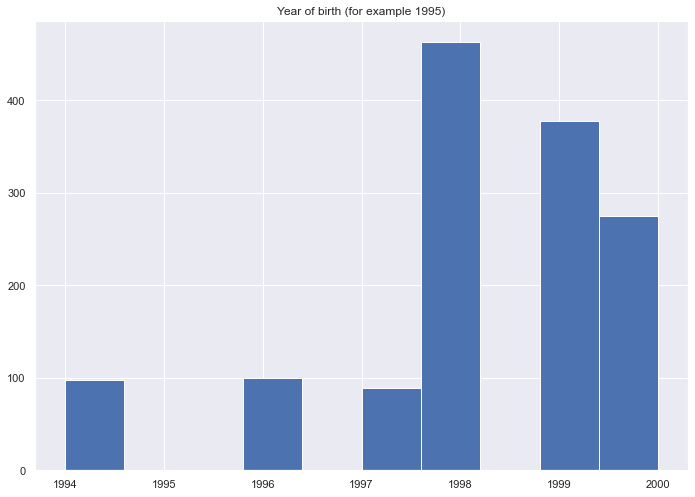

In [40]:
all_users.hist('Year of birth (for example 1995)')

<AxesSubplot:xlabel='User ID', ylabel='count'>

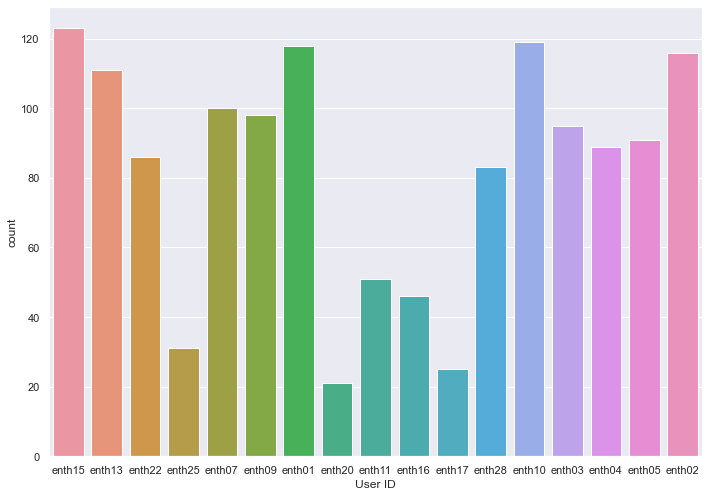

In [41]:
sns.countplot(x="User ID", data=all_users)
#Number of responses per user

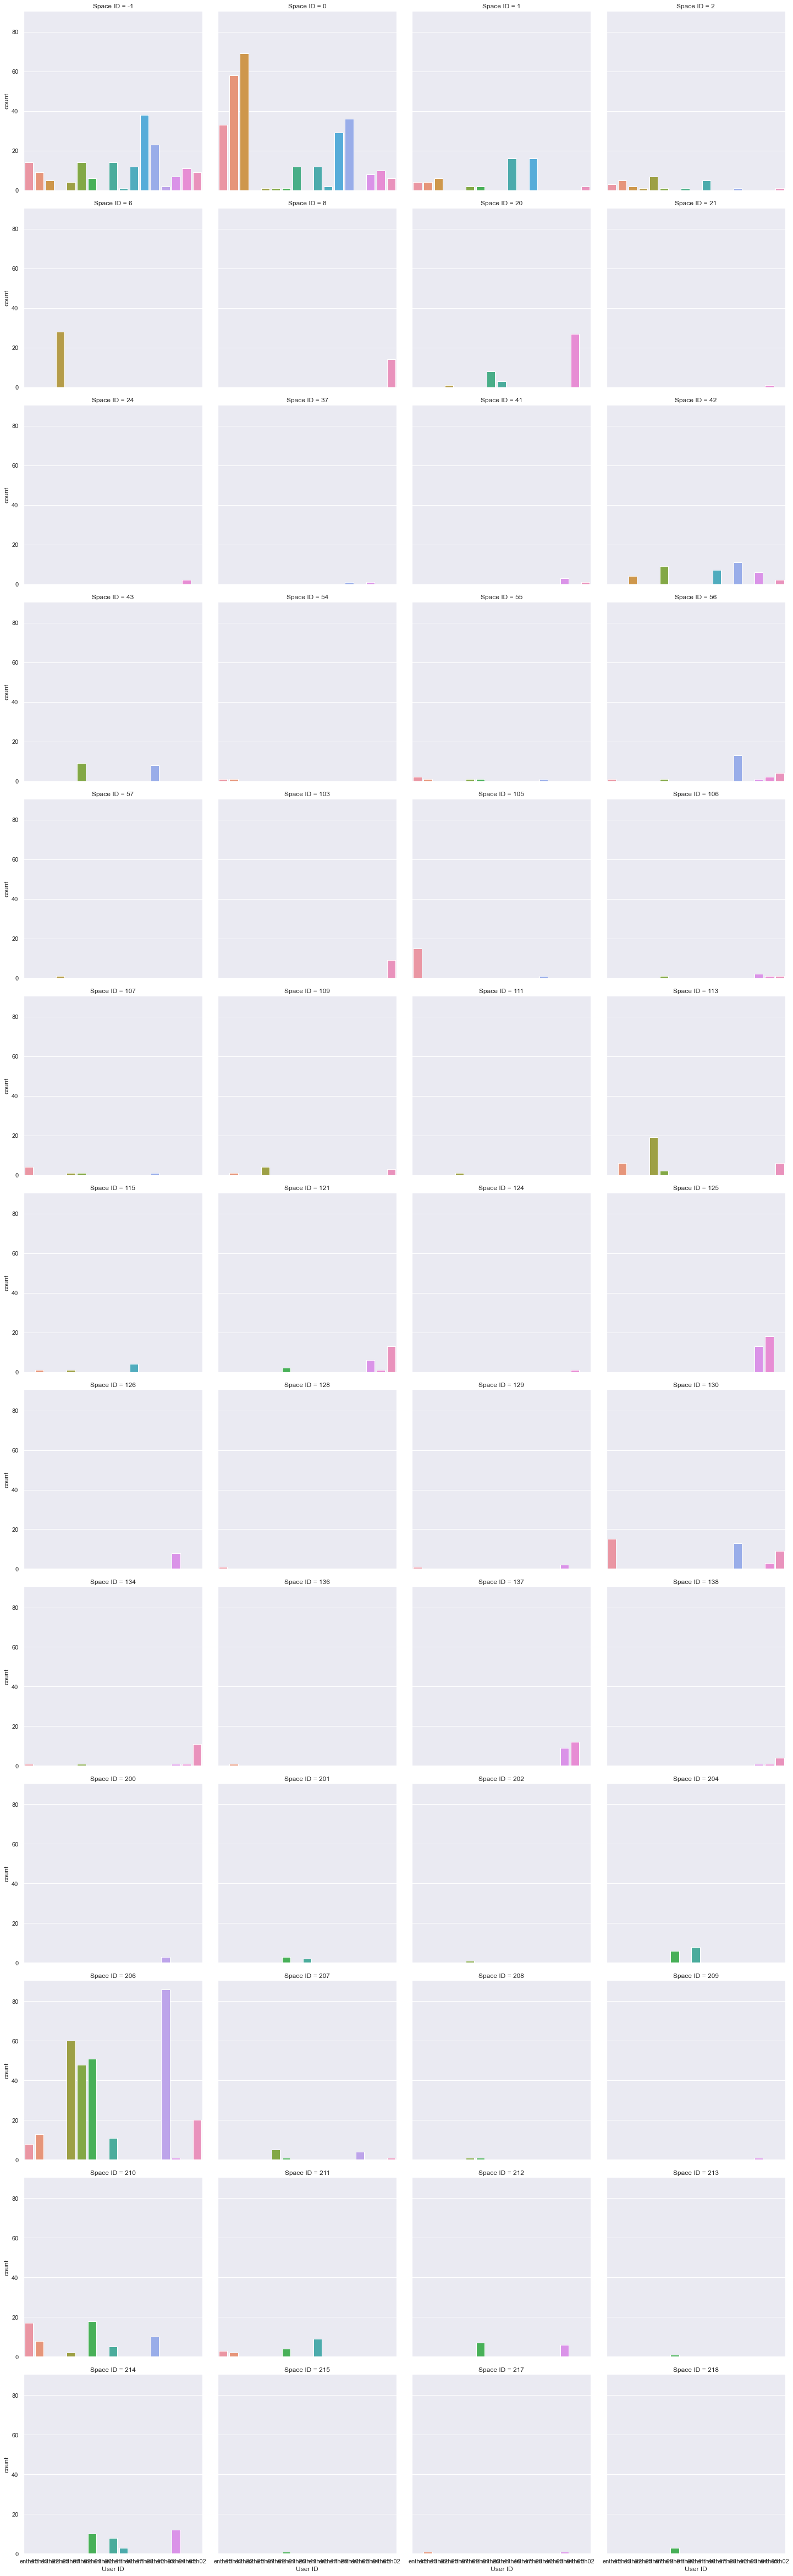

In [42]:
sns.catplot(x="User ID", col="Space ID", col_wrap=4, kind="count", data=all_users)
#Which areas are most visited by the users; Space ID -1 should not be counted as it represents areas with no no Space ID

In [43]:
#From the above plot, it seems that Space ID = 0 and 206 are the most visited locations
#We can then use find_space_name
print(find_space_name(0))
print(find_space_name(206))

SDE4 EXHIBITON SPACE
SDE2 CORRIDOR2-1
